In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_parquet("listings_processed.parquet")

# Data Exploration and Cleaning

In [4]:
data.head()

,id,listing_url,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,verification_phone,verification_email,verification_reviews,verification_jumio,verification_facebook,verification_government_id,verification_offline_government_id,verification_selfie,verification_identity_manual,verification_work_email
0,2818,https://www.airbnb.com/rooms/2818,3159,14146.0,within an hour,1.0,True,1.0,1.0,True,...,True,True,True,False,False,False,False,False,False,False
1,3209,https://www.airbnb.com/rooms/3209,3806,14176.0,within an hour,1.0,False,1.0,1.0,True,...,True,True,True,True,False,False,False,False,False,False
2,20168,https://www.airbnb.com/rooms/20168,59484,14580.0,within a few hours,1.0,False,2.0,2.0,True,...,True,True,True,False,False,False,False,False,False,False
3,25428,https://www.airbnb.com/rooms/25428,56142,14568.0,within a few hours,1.0,False,2.0,2.0,True,...,True,True,True,False,False,False,False,False,False,False
4,27886,https://www.airbnb.com/rooms/27886,97647,14691.0,within an hour,1.0,True,1.0,1.0,True,...,True,True,True,True,False,False,False,False,False,False


In [5]:
# removing columns that cannot be included in modelling
data.drop(['listing_url','id','host_id'],axis=1,inplace=True)

In [6]:
#check for null/nan and replace with 0
data = data.replace(np.nan,0)

In [7]:
# convert necessary columns to boolean 
data['host_is_superhost'] = data['host_is_superhost'].astype(bool)
data['host_has_profile_pic'] = data['host_has_profile_pic'].astype(bool)
data['host_identity_verified'] = data['host_identity_verified'].astype(bool)

In [8]:
# list of differnt column types
list_bool_columns = list(data.select_dtypes(include=['bool']).columns)
list_category_columns = list(data.select_dtypes(include=['category']).columns)
list_object_columns = list(data.select_dtypes(include=['object']).columns)

In [9]:
data['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'a few days or more', 0,
       'within a day'], dtype=object)

In [10]:
# convert object columns to categories to do one-hot encoding
data[list_object_columns] = data[list_object_columns].astype('category')

In [11]:
# one-hot encoding
data_with_dummies = pd.get_dummies(data=data,columns=list_object_columns)

In [12]:
data_with_dummies.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,14146.0,1.0,True,1.0,1.0,True,False,False,2,1.5,...,0,0,0,0,1,0,0,1,0,0
1,14176.0,1.0,False,1.0,1.0,True,True,True,5,1.0,...,0,0,0,0,1,0,1,0,0,0
2,14580.0,1.0,False,2.0,2.0,True,False,True,2,1.0,...,0,0,0,0,1,0,0,1,0,0
3,14568.0,1.0,False,2.0,2.0,True,False,False,3,1.0,...,0,0,0,0,1,0,0,1,0,0
4,14691.0,1.0,True,1.0,1.0,True,True,True,2,1.0,...,0,0,0,0,1,0,0,1,0,0


In [13]:
data_with_dummies.columns

Index(['host_since', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'accommodates', 'bathrooms',
       ...
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'],
      dtype='object', length=147)

In [14]:
data_with_dummies.describe()

,host_since,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
count,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,...,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.000000,20114.00000
mean,16412.904445,0.617407,6.187183,6.187183,2.887392,1.128990,1.448792,1.856667,10.811872,146.122104,...,0.000795,0.000298,0.002138,0.007259,0.989510,0.230785,0.376355,0.391021,0.000149,0.00169
std,698.332163,0.468658,25.149078,25.149078,1.310228,0.365886,0.895576,1.383321,106.641772,120.794404,...,0.028193,0.017269,0.046188,0.084890,0.101886,0.421345,0.484483,0.487991,0.012212,0.04108
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,15924.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,16388.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,125.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,16909.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,0.000000,170.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000
max,17750.000000,1.000000,629.000000,629.000000,17.000000,15.000000,12.000000,32.000000,3229.000000,8000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [15]:
data_with_dummies[['price', 'cleaning_fee', 'extra_people', 'security_deposit']].head(3)

,price,cleaning_fee,extra_people,security_deposit
0,69.0,40.0,20.0,100.0
1,78.0,40.0,15.0,300.0
2,80.0,0.0,0.0,0.0


In [16]:
data_with_dummies['price'].describe()

count    20114.000000
mean       146.122104
std        120.794404
min          0.000000
25%         95.000000
50%        125.000000
75%        170.000000
max       8000.000000
Name: price, dtype: float64

## Check for distribution of target and few numerical inputs

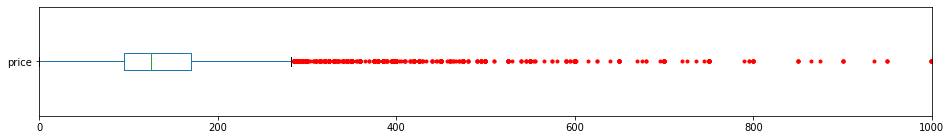

In [18]:
## analysing target variable 'price' distribution
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_with_dummies['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [19]:
# remove outliers in price (price > 700 and 0 or less)
data_with_dummies.drop(data_with_dummies[ (data_with_dummies.price > 700) | (data_with_dummies.price <= 0) ].index, axis=0, inplace=True)

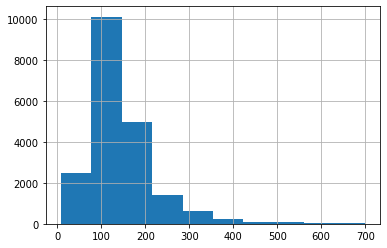

In [20]:
data_with_dummies['price'].hist()

In [21]:
data_with_dummies.shape

(20047, 147)

In [22]:
data_with_dummies[['square_feet','cleaning_fee','security_deposit']].describe()

,square_feet,cleaning_fee,security_deposit
count,20047.000000,20047.000000,20047.000000
mean,10.737916,31.784407,149.655011
std,106.136079,25.373788,273.163622
min,0.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000
50%,0.000000,30.000000,100.000000
75%,0.000000,45.000000,250.000000
max,3229.000000,531.000000,4736.000000


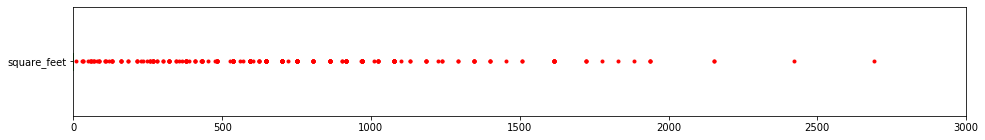

In [23]:
# analyse 'square_feet'
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_with_dummies['square_feet'].plot(kind='box', xlim=(0, 3000), vert=False, flierprops=red_square, figsize=(16,2));

In [24]:
len(data_with_dummies.loc[data_with_dummies['square_feet'] == 0])

19760

In [25]:
# remove 'square_feet' completely since it is with too many null values
data_with_dummies.drop(['square_feet'],axis=1,inplace=True)

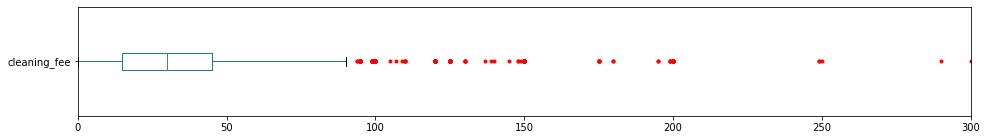

In [26]:
# analyse 'cleaning_fee'
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_with_dummies['cleaning_fee'].plot(kind='box', xlim=(0, 300), vert=False, flierprops=red_square, figsize=(16,2));

In [27]:
# remove outliers in 'cleaning_fee' (>150)
data_with_dummies.drop(data_with_dummies[ (data_with_dummies.cleaning_fee > 150) ].index, axis=0, inplace=True)

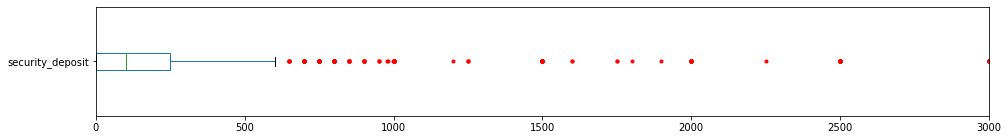

In [28]:
# analyse 'security_deposit'
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_with_dummies['security_deposit'].plot(kind='box', xlim=(0, 3000), vert=False, flierprops=red_square, figsize=(16,2));

In [29]:
# remove outliers in 'security_deposit' (>1000)
data_with_dummies.drop(data_with_dummies[ (data_with_dummies.security_deposit > 1000) ].index, axis=0, inplace=True)

In [30]:
print(len(data_with_dummies.loc[data_with_dummies['bathrooms'] == 0]))
print(len(data_with_dummies.loc[data_with_dummies['bedrooms'] == 0]))

32
1147


In [31]:
# drop rows with 0 in bathrooms and bedrooms since it is illogical and might skew the results
data_with_dummies.drop(data_with_dummies[(data_with_dummies.bathrooms == 0) | (data_with_dummies.bedrooms == 0)].index, axis=0, inplace=True)

In [32]:
data_with_dummies.shape

(18700, 146)

# Feature Selection

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [34]:
## split dataset into training and testing sets
train_features, test_features, train_values, test_values=train_test_split(
    data_with_dummies.drop(labels=['price'], axis=1),
    data_with_dummies['price'],
    test_size=0.2,
    random_state=41)

In [35]:
## remove all constant columns while it is not useful in predicting
def remove_constant_columns(train_features):
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_features)
    constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]
    return constant_columns

In [36]:
## remove all quasi constant columns while it will not affect the prediction much
def remove_quasi_constant_columns(train_features):
    qconstant_filter = VarianceThreshold(threshold=0.01)
    qconstant_filter.fit(train_features)
    qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]
    return qconstant_columns

In [37]:
## remove all duplicate columns to reduce feature space
def remove_duplicate_columns(train_features):
    train_features_T = train_features.T
    unique_features = train_features_T.drop_duplicates(keep='first').T
    duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
    return duplicated_features

In [38]:
## remove all correalted columns to reduce feature space
def remove_correlated_features(train_features):
    correlated_features = set()
    correlation_matrix = train_features.corr()
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

In [39]:
# remove columns that cannot be influenced by user, and some redundant columns
non_influenceable_columns = ['host_is_superhost','number_of_reviews', 'first_review', 'reviews_per_month', 'days_since_calendar_updated', 'verification_phone', 'verification_email',
       'verification_reviews', 'verification_jumio', 'verification_facebook',
       'verification_government_id', 'verification_selfie',
       'verification_work_email']
train_features.drop(labels=non_influenceable_columns, axis=1, inplace=True)
test_features.drop(labels=non_influenceable_columns, axis=1, inplace=True)

In [40]:
constant_columns = remove_constant_columns(train_features)
train_features.drop(labels=constant_columns, axis=1, inplace=True)
test_features.drop(labels=constant_columns, axis=1, inplace=True)

In [41]:
qconstant_columns = remove_quasi_constant_columns(train_features)
train_features.drop(labels=qconstant_columns, axis=1, inplace=True)
test_features.drop(labels=qconstant_columns, axis=1, inplace=True)

In [42]:
duplicated_columns = remove_duplicate_columns(train_features)
train_features.drop(labels=duplicated_columns, axis=1, inplace=True)
test_features.drop(labels=duplicated_columns, axis=1, inplace=True)

In [43]:
correlated_features = remove_correlated_features(train_features)
train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

In [44]:
train_features.shape, test_features.shape

((14960, 56), (3740, 56))

In [45]:
train_features.head()

,host_since,host_response_rate,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,security_deposit,cleaning_fee,...,property_type_Bed and breakfast,property_type_Boat,property_type_Condominium,property_type_House,property_type_Loft,property_type_Townhouse,room_type_Entire home/apt,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
6105,15493.0,0.0,1.0,False,False,4,1.0,2.0,200.0,20.0,...,0,0,0,0,0,0,1,1,0,0
1798,16139.0,1.0,1.0,False,True,2,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
14425,15832.0,0.0,1.0,True,True,2,1.0,1.0,250.0,30.0,...,0,0,0,0,0,0,0,0,0,1
19894,17122.0,1.0,3.0,False,True,2,1.0,1.0,0.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4772,15527.0,0.5,1.0,True,True,2,1.0,1.0,0.0,50.0,...,0,0,0,0,0,0,1,0,1,0


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
plt.rcParams["figure.figsize"] = (12,12)
plt.subplots_adjust(top = 1.5,hspace = 3.0)

<Figure size 864x864 with 0 Axes>

In [49]:
# to get an idea of best features to influence the price
features = pd.concat([train_features, test_features], ignore_index=True)
values = pd.concat([train_values, test_values], ignore_index=True)
fs = SelectKBest(score_func=f_regression, k=20)
# apply feature selection
features_selected = fs.fit(features, values)
dfscores = pd.DataFrame(features_selected.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Specs        Score
5                                      accommodates  7935.090420
7                                          bedrooms  6644.360816
9                                      cleaning_fee  2705.841397
6                                         bathrooms  2243.109269
52                        room_type_Entire home/apt  2054.141141
10                                  guests_included  1404.526550
8                                  security_deposit  1054.541438
14                                  availability_30   870.284338
32              neighbourhood_cleansed_Centrum-West   527.378998
15                                 availability_365   497.146735
45                          property_type_Apartment   367.667806
55  cancellation_policy_strict_14_with_grace_period   337.721072
31              neighbourhood_cleansed_Centrum-Oost   297.159803
21                                   amenity_washer   259.242008
22                       

In [51]:
# scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features  = sc.fit_transform(test_features)

# Models and Prediction

## Compare prediction from different regression models to choose the best one
    
    * K - Nearest Neighbors
    * XGBoost (Gradient boosted trees)
    * Neural Net
    * Support Vector Regression (SVR)
    * Random Forest Regression
    
Please find the comparison results below

In [52]:
## KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')
knn.fit(train_features, train_values)
y_pred = knn.predict(test_features)

In [53]:
## KNN - error calculation
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(test_values, y_pred))
print(f"RMSE_KNN: {round(RMSE, 4)}")
r2 = r2_score(test_values, y_pred)
print(f"r2_KNN: {round(r2, 4)}")

RMSE_KNN: 63.9283
r2_KNN: 0.3683


In [55]:
## XgBoost
import xgboost  as xgb
model = xgb.XGBRegressor()

In [56]:
## hyper parameter tuning with Grid Search Cross Validation
#from sklearn.model_selection import GridSearchCV

# create Grid
#param_grid = {'n_estimators': [100, 150, 200],
#              'learning_rate': [0.01, 0.05, 0.1], 
#              'max_depth': [3, 4, 5, 6, 7],
#              'colsample_bytree': [0.6, 0.7, 1],
#              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
#booster_grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
#booster_grid_search.fit(train_features, train_values)

# print best estimator parameters found during the grid search
#print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [57]:
## xgb prediction and error calculation
model = xgb.XGBRegressor(colsample_bytree= 0.6, gamma= 0.2, learning_rate= 0.1, max_depth= 6, n_estimators= 200)
model.fit(train_features, train_values)
# make predictions for test data and evaluate
y_pred = model.predict(test_features)
RMSE = np.sqrt(mean_squared_error(test_values, y_pred))
print(f"RMSE_XGB: {round(RMSE, 4)}")
r2 = r2_score(test_values, y_pred)
print(f"r2_XGB: {round(r2, 4)}")

RMSE_XGB: 54.3626
r2_XGB: 0.5432


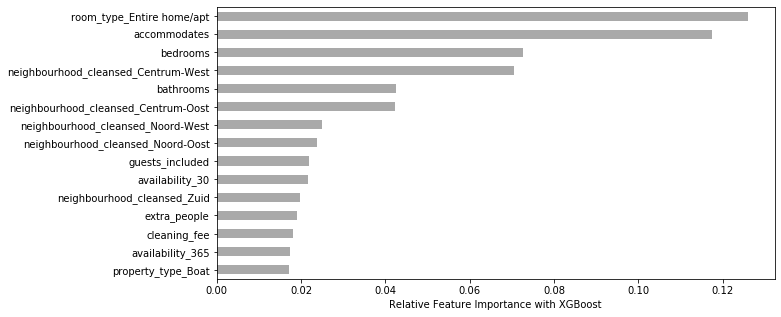

In [58]:
# plot the important features
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

In [60]:
# to check for error(rmse) development
xg_train = xgb.DMatrix(data=train_features, label=train_values)
params = {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

cv_results = xgb.cv(dtrain=xg_train, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

In [61]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,148.821900,1.440843,148.948827,3.047133
1,136.570307,1.763643,136.809779,2.696876
2,125.482346,1.563632,125.957189,2.857103
3,115.570508,1.514132,116.266698,2.868219
4,106.751747,1.400588,107.664698,2.995727


In [62]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
157,33.360871,0.480469,50.092203,1.898031
158,33.307073,0.483915,50.092986,1.888018
159,33.273902,0.481450,50.090381,1.885192
160,33.221201,0.470995,50.090128,1.882343
161,33.196995,0.457995,50.088092,1.884207


In [63]:
## Neural Net 
from keras import models, layers, optimizers, regularizers, callbacks

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(train_features.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(
    optimizer=optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

# Printing the model summary
print(nn2.summary())

# Visualising the neural network
#SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))
early_stop = callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=10
)
# Training the model
nn2.fit(train_features,
        train_values,
        epochs=150,
        batch_size=256,
        validation_split = 0.1,
        callbacks=[early_stop])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               7296      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 172,161
Trainable params: 172,161
Non-trainable params: 0
_________________________________________________________________
None
Train on 13464 samples, validate on 1496 samples
Epoch 1/150
13464/13464 [==============================] - 0

Epoch 51/150
13464/13464 [==============================] - 0s 20us/step - loss: 33.0884 - mae: 33.0884 - val_loss: 35.4556 - val_mae: 35.4556
Epoch 52/150
13464/13464 [==============================] - 0s 19us/step - loss: 33.0075 - mae: 33.0075 - val_loss: 35.4370 - val_mae: 35.4370
Epoch 53/150
13464/13464 [==============================] - 0s 19us/step - loss: 32.9134 - mae: 32.9134 - val_loss: 35.4311 - val_mae: 35.4311
Epoch 54/150
13464/13464 [==============================] - 0s 22us/step - loss: 32.8296 - mae: 32.8296 - val_loss: 35.3986 - val_mae: 35.3986
Epoch 55/150
13464/13464 [==============================] - 0s 19us/step - loss: 32.7816 - mae: 32.7816 - val_loss: 35.4085 - val_mae: 35.4085
Epoch 56/150
13464/13464 [==============================] - 0s 19us/step - loss: 32.7121 - mae: 32.7121 - val_loss: 35.3852 - val_mae: 35.3852
Epoch 57/150
13464/13464 [==============================] - 0s 19us/step - loss: 32.6459 - mae: 32.6459 - val_loss: 35.3796 - val_mae: 35.3796

In [64]:
## neural net prediction and error calculation
y_pred = nn2.predict(test_features)
from math import sqrt
print(f'mse_NN {mean_squared_error(test_values, y_pred)}')
print(f'rmse_NN {np.sqrt(mean_squared_error(test_values, y_pred))}')
print(f'r2_NN {r2_score(test_values, y_pred)}')

mse_NN 3061.530902255595
rmse_NN 55.33110248545202
r2_NN 0.5268131698882663


In [65]:
# SVR
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#rbf = Gaussian Radial Basis Function Kernel
regressor.fit(train_features, train_values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
## SVR prediction and error calculation
y_pred = regressor.predict(test_features)
RMSE = np.sqrt(mean_squared_error(test_values, y_pred))
print(f"RMSE_SVR: {round(RMSE, 4)}")
r2 = r2_score(test_values, y_pred)
print(f"r2_SVR: {round(r2, 4)}")

RMSE_SVR: 67.983
r2_SVR: 0.2857


In [67]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
model.fit(train_features,train_values)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
## RF prediction and error calculation
y_pred = model.predict(test_features)
RMSE = np.sqrt(mean_squared_error(test_values, y_pred))
print(f"RMSE_RF: {round(RMSE, 4)}")
r2 = r2_score(test_values, y_pred)
print(f"r2_RF: {round(r2, 4)}")

RMSE_RF: 65.3538
r2_RF: 0.3399


## Prediction Comparison

* KNN Regression
    RMSE_KNN: 63.9283
    r2_KNN: 0.3683
* XGBoost Regression
    RMSE_XGB: 54.3626
    r2_XGB: 0.5432
* NN REgression
    rmse_NN: 55.33110248545202
    r2_NN: 0.5268131698882663
* SVR
    RMSE_SVR: 67.983
    r2_SVR: 0.2857
* RF
    RMSE_RF: 65.3538
    r2_RF: 0.3399
    
XgBoost performs better than other models. Although, model can explain only 55% of variance, nearly 50% of variance (r-squared) are explained by features relating to size and location. So, further this model accuracy can be improved by more cleaner and enhanced data relating to size and location of accomodation and addition of more features which might explain 'price' even more (for eg., floor_number, elevator_available, view_from_window etc.,).   

## Scaling factors

* Code enhancements (right libraries and tools)
    - for eg., use of dask, modin, tensorflow, keras etc.
* Use of distributed frameworks
    - eg., SparkML
* Scale with cloud infrastructure frameworks
    - eg., Google Cloud Platform, AWS etc.
    - utilizing built-in functions for hyper parameter tuning etc.
    - scaling to higher compute engines,if needed, in terms of memory and efficiency